In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [58]:
estado_by_codigo = {11: "RO", 12: "AC", 13: "AM", 14: "RR", 15: "PA", 16: "AP", 17: "TO",
                    21: "MA", 22: "PI", 23: "CE", 24: "RN", 25: "PB", 26: "PE", 27: "AL",
                    28: "SE", 29: "BA", 31: "MG", 32: "ES", 33: "RJ", 35: "SP", 41: "PR", 
                    42: "SC", 43: "RS", 50: "MS", 51: "MT", 52: "GO", 53: "DF"}

In [131]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}
regiao_by_estado = {}
for regiao in regioes:
    for estado in regioes[regiao]:
        regiao_by_estado[estado] = regiao
regiao_by_estado

{'AM': 'Norte',
 'MA': 'Norte',
 'PA': 'Norte',
 'AC': 'Norte',
 'RR': 'Norte',
 'AP': 'Norte',
 'RO': 'Norte',
 'TO': 'Norte',
 'PB': 'Nordeste',
 'RN': 'Nordeste',
 'BA': 'Nordeste',
 'PI': 'Nordeste',
 'CE': 'Nordeste',
 'AL': 'Nordeste',
 'PE': 'Nordeste',
 'SE': 'Nordeste',
 'MG': 'Sudeste',
 'RJ': 'Sudeste',
 'ES': 'Sudeste',
 'SP': 'Sudeste',
 'GO': 'Centro-Oeste',
 'MT': 'Centro-Oeste',
 'DF': 'Centro-Oeste',
 'MS': 'Centro-Oeste',
 'RS': 'Sul',
 'PR': 'Sul',
 'SC': 'Sul'}

In [220]:
dataframe = pd.read_csv("../outros/municipio_raca_cor.csv")

In [221]:
dataframe

,id_municipio,Total,Branca,Preta,Parda
0,1100015,100,"43,39","4,49","49,7"
1,1100023,100,"35,44","8,64","53,68"
2,1100031,100,"46,22","7,37","44,78"
3,1100049,100,"41,79","5,77","49,27"
4,1100056,100,"47,83","5,08","46,07"
...,...,...,...,...,...
5560,5222005,100,"41,02","6,95","50,79"
5561,5222054,100,"46,58","3,57","48,44"
5562,5222203,100,"15,49","9,86","71,83"
5563,5222302,100,"26,84","6,11","64,43"


In [222]:
dataframe["Preta"] = dataframe["Preta"].str.replace("-", "0")

In [223]:
for raca in ["Branca", "Preta", "Parda"]:
    dataframe.loc[:, raca] = dataframe[raca].str.replace(',', '.').astype(float).copy()

In [224]:
dataframe

,id_municipio,Total,Branca,Preta,Parda
0,1100015,100,43.39,4.49,49.70
1,1100023,100,35.44,8.64,53.68
2,1100031,100,46.22,7.37,44.78
3,1100049,100,41.79,5.77,49.27
4,1100056,100,47.83,5.08,46.07
...,...,...,...,...,...
5560,5222005,100,41.02,6.95,50.79
5561,5222054,100,46.58,3.57,48.44
5562,5222203,100,15.49,9.86,71.83
5563,5222302,100,26.84,6.11,64.43


In [228]:
regioes_df = {"Norte": pd.DataFrame(columns=["Negra"]),
              "Nordeste": pd.DataFrame(columns=["Negra"]),
              "Sudeste": pd.DataFrame(columns=["Negra"]),
              "Centro-Oeste": pd.DataFrame(columns=["Negra"]),
              "Sul": pd.DataFrame(columns=["Negra"])}

for codigo in estado_by_codigo:
    df_estado = dataframe[dataframe["id_municipio"] // 10**5 == codigo][["Preta", "Parda"]].copy()
    df_porc = pd.DataFrame((df_estado["Preta"] + df_estado["Parda"]).values, columns=["Negra"])
    regiao = regiao_by_estado[estado_by_codigo[codigo]]
    regioes_df[regiao] = pd.concat([regioes_df[regiao], df_porc])

In [240]:
regioes_df["Norte"]["Negra"]

0      54.19
1      62.32
2      52.15
3      55.04
4      51.15
       ...  
212    77.32
213    75.96
214    72.17
215    77.55
216    79.13
Name: Negra, Length: 666, dtype: float64

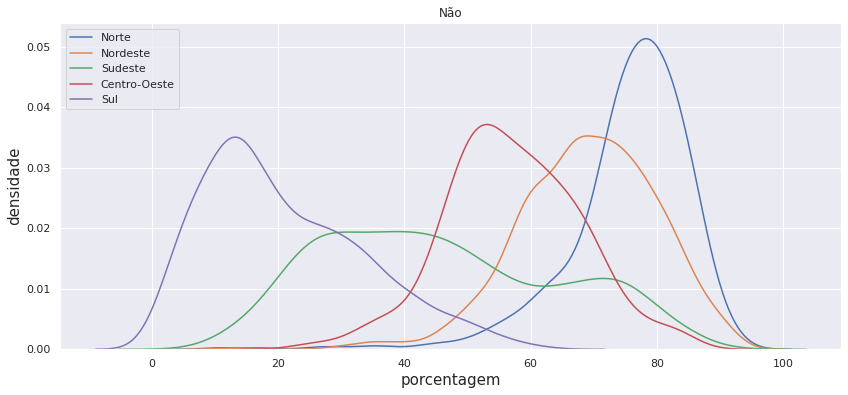

In [248]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
#for regiao in regioes:
#    regiao_diferencas = dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])]["diferenca"]
#    sns.kdeplot(regiao_diferencas)
for regiao in regioes:
    sns.kdeplot(regioes_df[regiao]["Negra"].values)
plt.title("Não")
plt.xlabel("porcentagem", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()